In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

# Ouverture des fichiers de données

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.set_index('PassengerId',inplace=True)

In [4]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
test_df.set_index('PassengerId',inplace=True)


In [6]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### On fusionne le dataset de test et de train pour la visualisation et le preprocessing

In [7]:
merged_df = pd.concat([train_df, test_df], ignore_index=False)

In [8]:
merged_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## Visualisation des données 

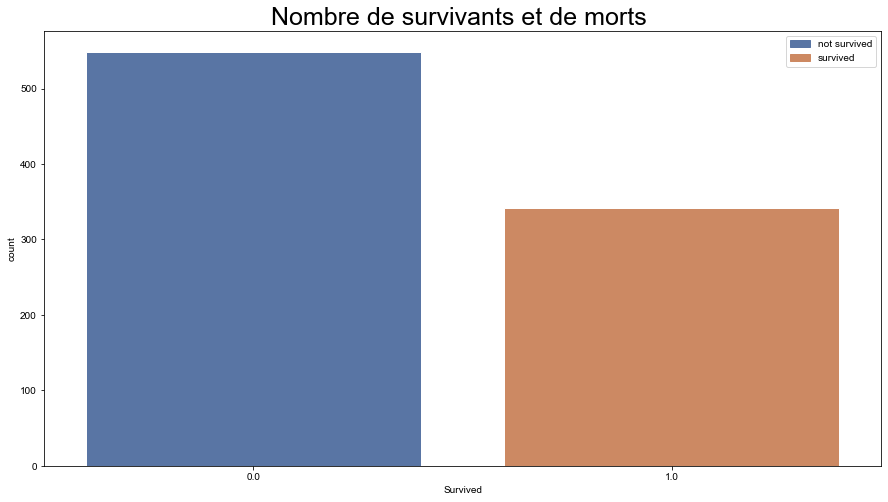

In [9]:
plt.figure(figsize=(15,8))
plt.title("Nombre de survivants et de morts " , fontsize=25)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
sns.set(font_scale=1.5)
sns.countplot(x='Survived', data=merged_df);
#plt.savefig('Nombre de survivants.jpg')

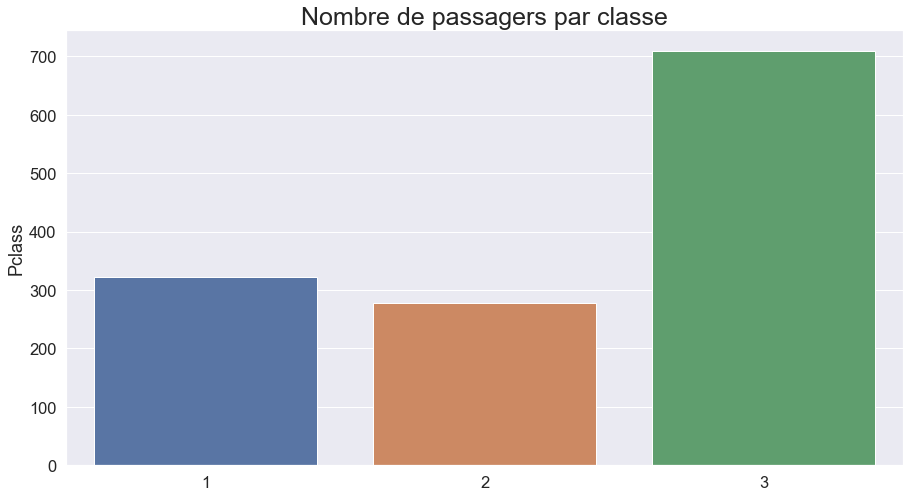

In [10]:
plt.figure(figsize=(15,8))
plt.title('Nombre de passagers par classe' , fontsize=25)
sns.barplot(x=merged_df['Pclass'].unique(), y=merged_df['Pclass'].value_counts(), data=merged_df);
#plt.savefig('Nombre de passagers par classe.jpg')

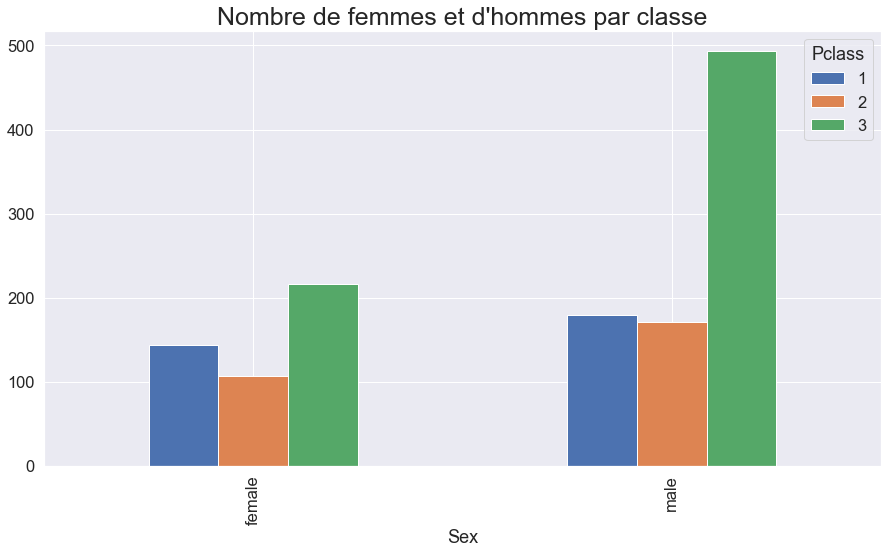

In [11]:
pd.crosstab(merged_df['Sex'], merged_df["Pclass"]).plot(kind='bar',figsize=(15,8))
plt.title("Nombre de femmes et d'hommes par classe", fontsize=25)
plt.show();
#plt.savefig("Nombre de femmes et d'hommes par classe.jpg")

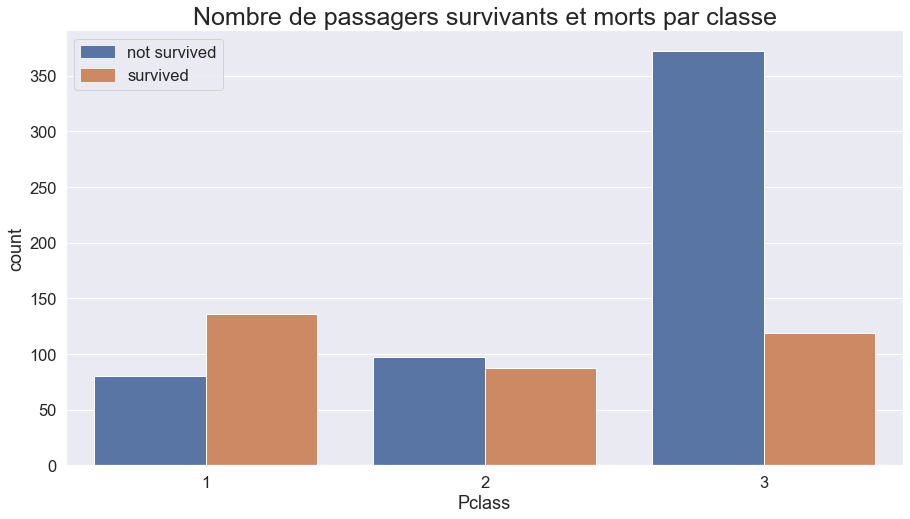

In [12]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par classe", fontsize=25)
sns.countplot(x=merged_df['Pclass'],hue='Survived', data=merged_df);
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
#plt.savefig("Nombre de survivants par classe.jpg")

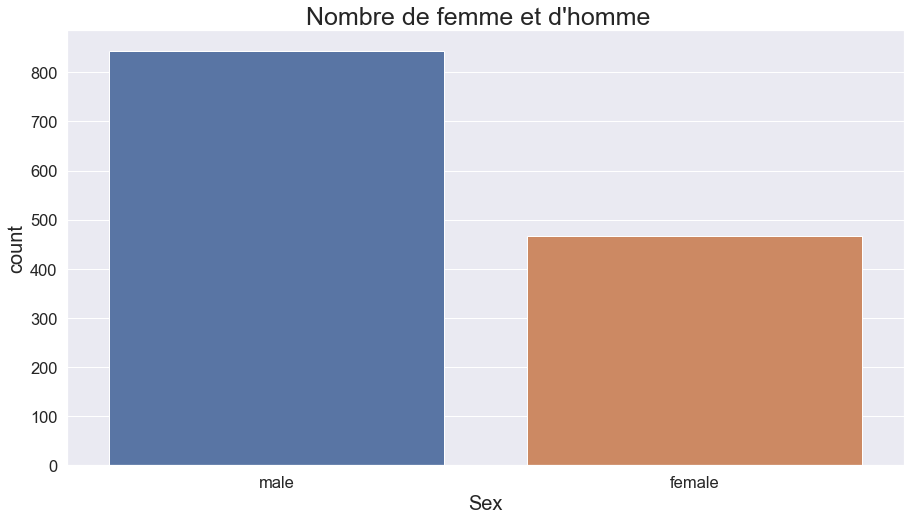

In [13]:
plt.figure(figsize=(15,8))
plt.title("Nombre de femme et d'homme  " , fontsize=25)
plt.xlabel('Sex',size=20)
plt.ylabel('Count',size=20)
sns.set(font_scale=1.5)
sns.countplot(x='Sex', data=merged_df);
#plt.savefig('Nombre de femme.jpg')

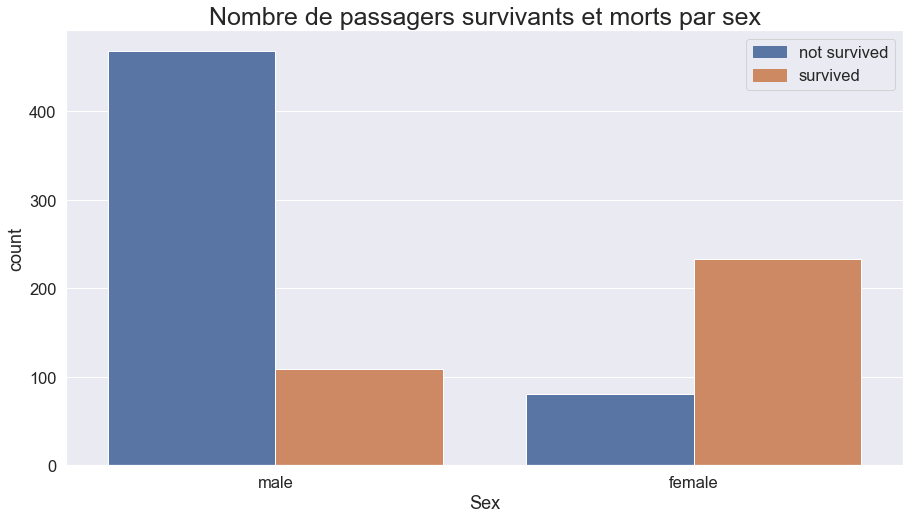

In [14]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par sex", fontsize=25)
sns.countplot(x=merged_df['Sex'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

#plt.savefig("Nombre de survivants par sex.jpg")


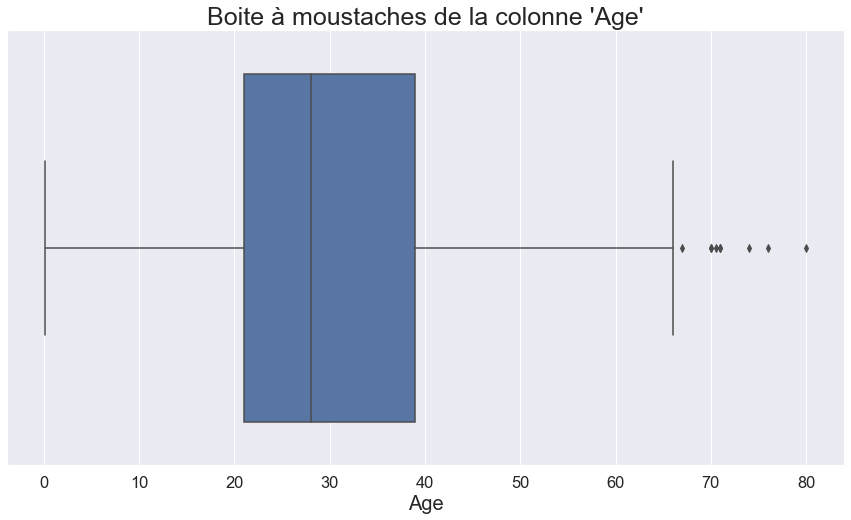

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(x=merged_df['Age']);
plt.title("Boite à moustaches de la colonne 'Age'" , fontsize=25)
plt.xlabel('Age',size=20);
#plt.savefig('boxplot_Age.jpg')


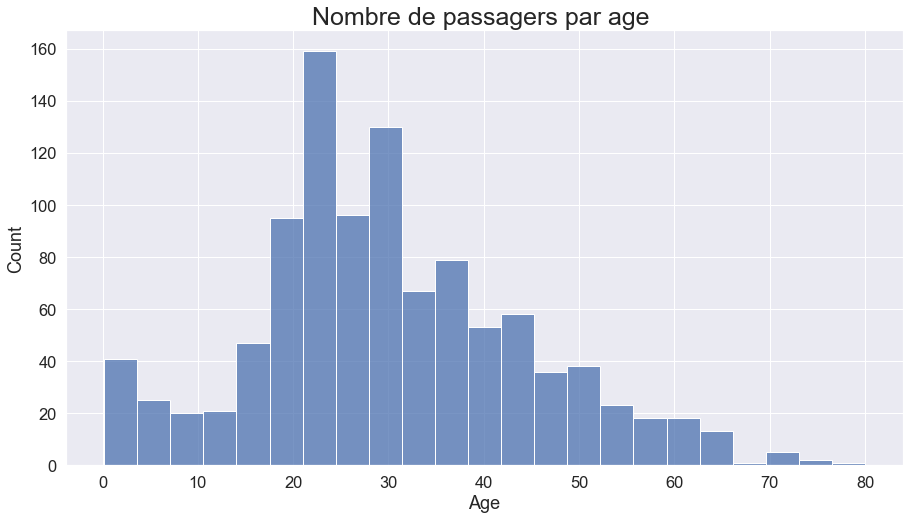

In [16]:
plt.figure(figsize=(15,8))
sns.histplot(merged_df["Age"])
plt.title("Nombre de passagers par age ", fontsize=25);
#plt.savefig("Nombre de pass par age.jpg")

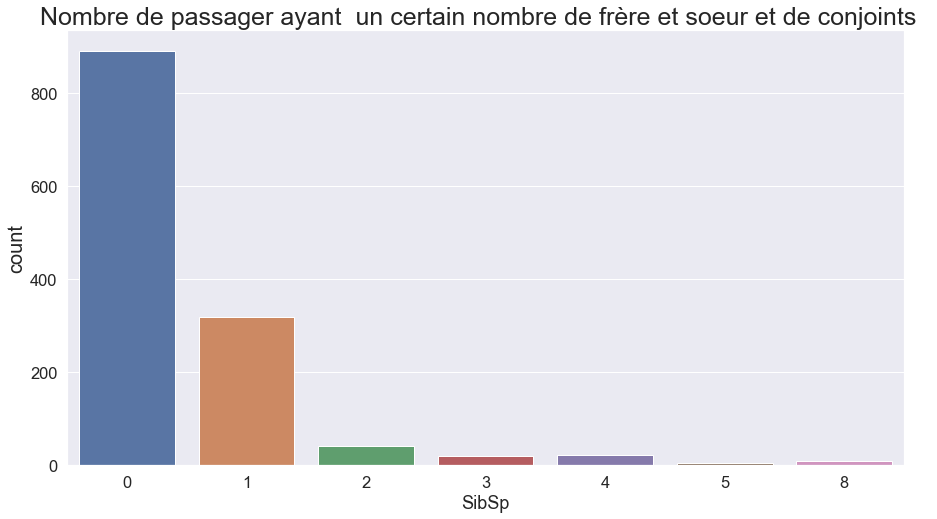

In [17]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passager ayant  un certain nombre de frère et soeur et de conjoints  " , fontsize=25)
plt.ylabel('Count',size=20)
sns.set(font_scale=1.5)
sns.countplot(x='SibSp', data=merged_df);
#plt.savefig('Nombre Sibsp.jpg')

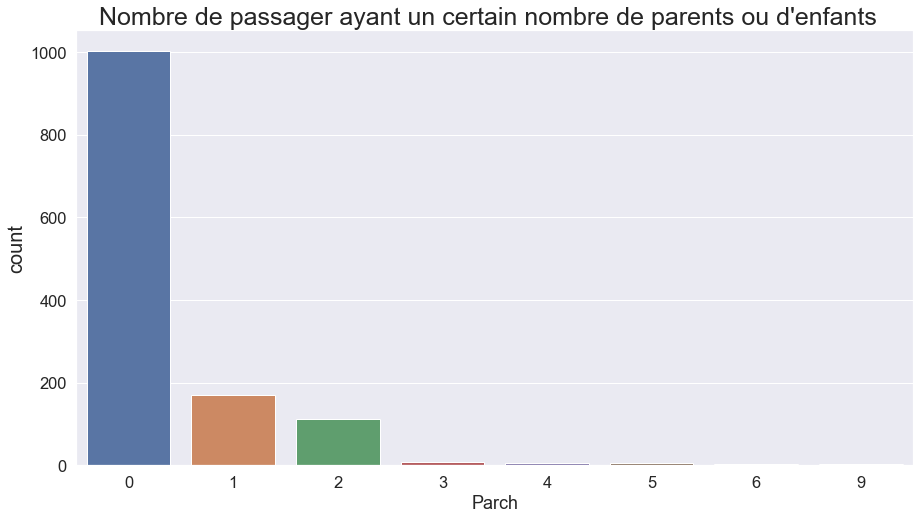

In [18]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passager ayant un certain nombre de parents ou d'enfants  " , fontsize=25)
plt.ylabel('Count',size=20)
sns.set(font_scale=1.5)
sns.countplot(x='Parch', data=merged_df);
#plt.savefig('Nombre Parch.jpg')

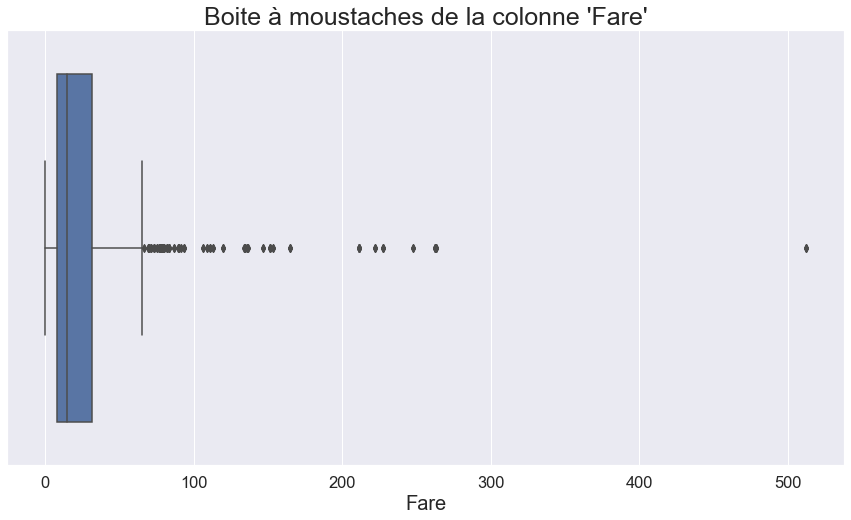

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x=merged_df['Fare']);
plt.title("Boite à moustaches de la colonne 'Fare'" , fontsize=25)
plt.xlabel('Fare',size=20);
#plt.savefig('boxplot_Fare.jpg')

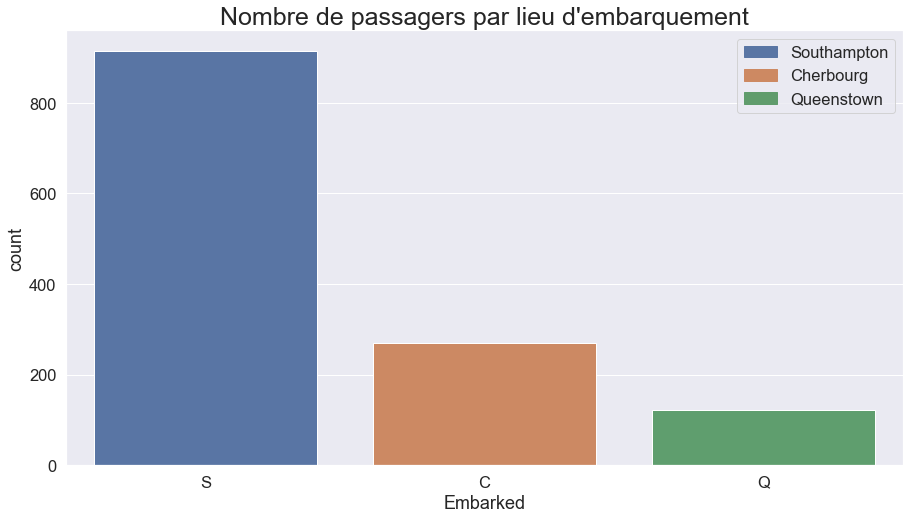

In [20]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers par lieu d'embarquement",fontsize=25)

sns.countplot(x=merged_df['Embarked'], data=merged_df);

colors = {'Southampton':'#5975a4', 'Cherbourg':'#cd8962', 'Queenstown':'#609c6c'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
#plt.savefig("Nombre de passagers par lieu d'embarquement.jpg");

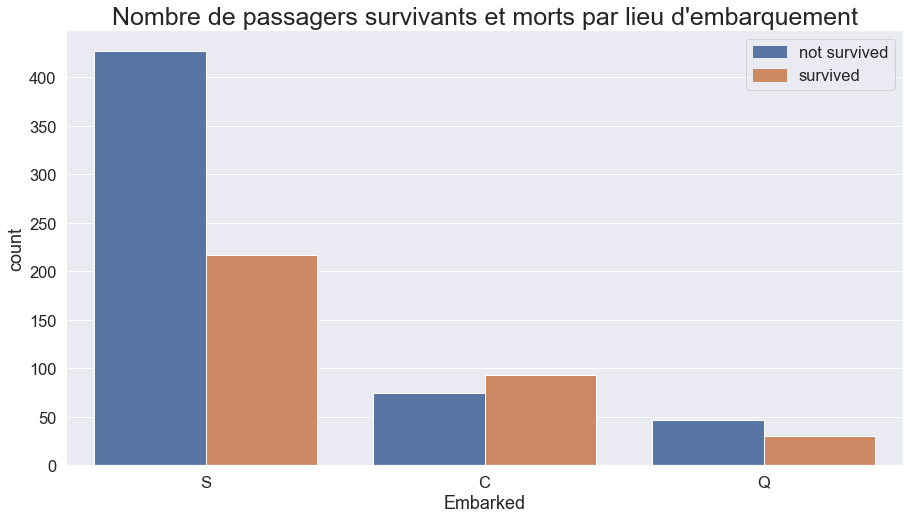

In [21]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par lieu d'embarquement", fontsize=25)

sns.countplot(x=merged_df['Embarked'],hue='Survived', data=merged_df);
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
#plt.savefig("Nombre de surviants par lieu d'embarquement.jpg");

### Visualisation Globale

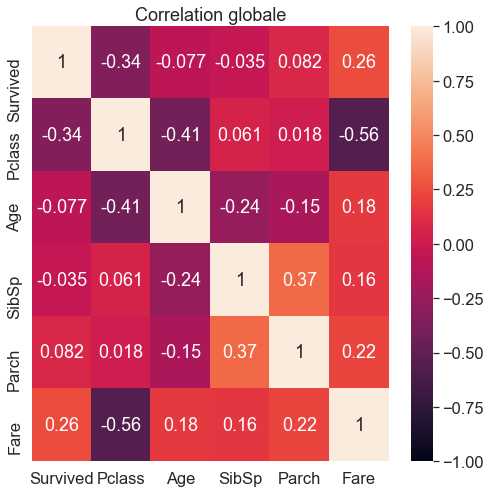

In [22]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(merged_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation globale');
#plt.savefig('corr.jpg')


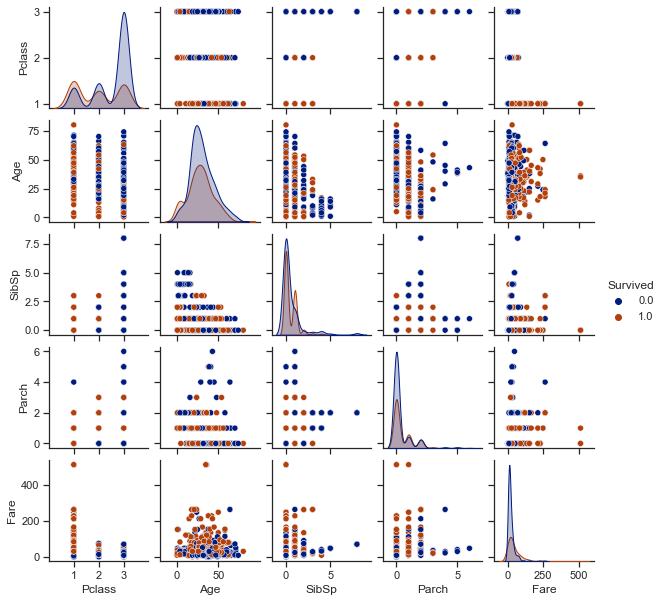

In [23]:
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(merged_df, hue='Survived', palette='dark',height=1.7)
#plt.savefig('pairplot.jpg')
plt.show();


## Traitement des valeurs manquantes

#### Type et ratio de données manquantes des colonnes

In [24]:
nb_m = merged_df.isnull().sum().sort_values()[:]
ratio_m = ( merged_df.isnull().sum()/merged_df.shape[0]).sort_values()[:]
manquant = pd.concat([nb_m, ratio_m], axis=1, sort=False)

In [25]:
l=list(manquant.index.values)

df=pd.DataFrame({'Types': merged_df[l].dtypes,
                       'Nb manquants': nb_m,
                      'Ratio manquants%': ratio_m,})
df.drop(index='Survived',inplace=True)
df

,Types,Nb manquants,Ratio manquants%
Pclass,int64,0,0.000000
Name,object,0,0.000000
Sex,object,0,0.000000
SibSp,int64,0,0.000000
Parch,int64,0,0.000000
Ticket,object,0,0.000000
Fare,float64,1,0.000764
Embarked,object,2,0.001528
Age,float64,263,0.200917
Cabin,object,1014,0.774637


In [26]:
df_missings = df[df['Nb manquants'] > 0]
df_missings 

,Types,Nb manquants,Ratio manquants%
Fare,float64,1,0.000764
Embarked,object,2,0.001528
Age,float64,263,0.200917
Cabin,object,1014,0.774637


#### On remplace les valeurs manquantes de "Embarked" par la valeur la plus frequente

In [27]:
merged_df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [28]:
merged_df["Embarked"].fillna('S', inplace=True)

#### On remplace les valeurs manquantes de "fare" par la mediane de fare pour la classe 3

In [29]:
merged_df[merged_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [30]:
merged_df["Fare"].fillna(merged_df.loc[(merged_df['Pclass'] == 3) ,'Fare'].median(), inplace=True)

#### On remplace les valeurs manquantes de "age" par la mediane par classe 

In [31]:
pclass_age_median = merged_df.groupby('Pclass')['Age'].transform('median')
merged_df['Age'].fillna(pclass_age_median , inplace=True)

## Traitement des outliers

#### AGE

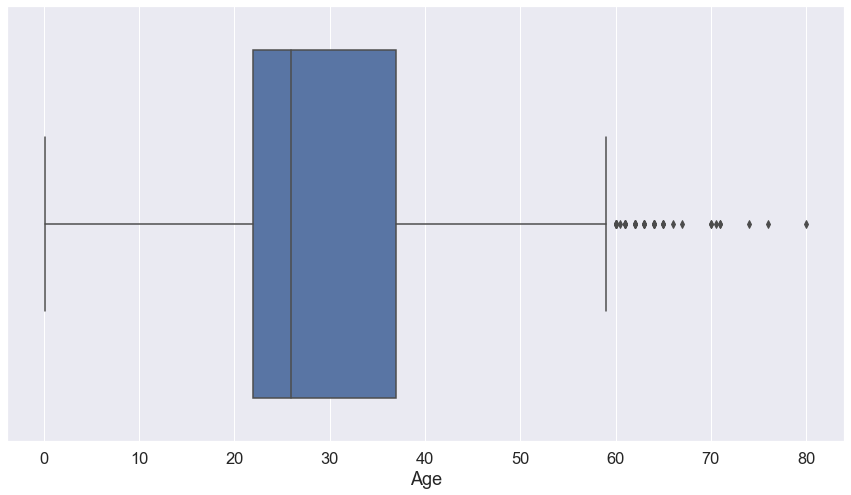

In [32]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(x=merged_df['Age']);


On va supprimer les outiliers, c'est à dire les vals > à 1.9 IQR au dessus de Q3

In [33]:
q3,q1=np.percentile(np.array(merged_df["Age"]),[75,25])

In [34]:
IQR=q3-q1

In [35]:
palier=IQR*1.9+q3

In [36]:
idx = merged_df.loc[merged_df["Age"] >palier].index
merged_df.drop(idx , inplace=True)

In [37]:
merged_df.loc[merged_df["Age"] >palier]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


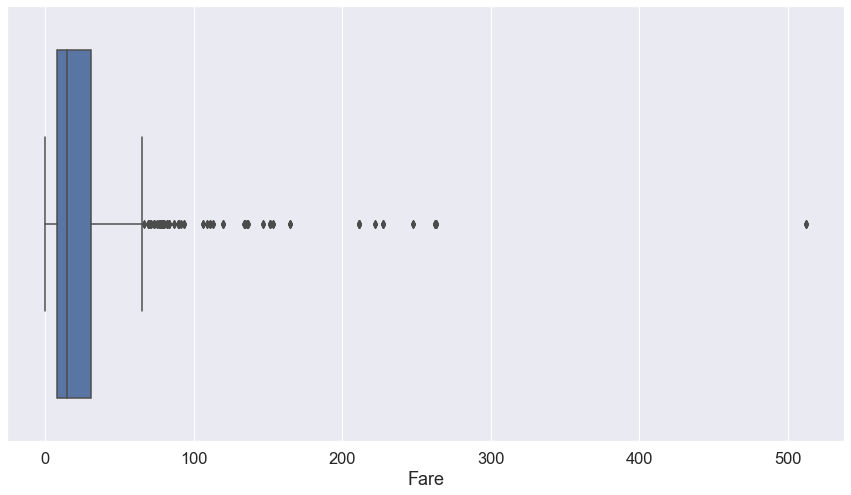

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(x=merged_df['Fare']);


In [39]:
 merged_df.loc[merged_df['Fare'] ==merged_df['Fare'].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


On ne va pas supprimer ces 4 valeurs car ce sont manifestement des vrais valeurs et ce sont des passagers de 1ere classe 

### Creation de nouvelles colonnes 

#### AgeCategorie

In [40]:
merged_df['AgeCategorie'] = np.where(merged_df['Age'] < 18,'Child', 'Adult')

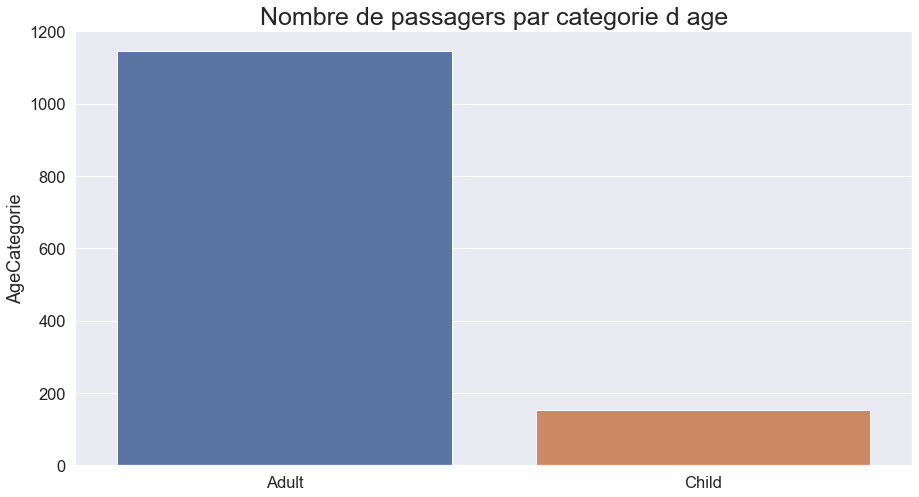

In [41]:
plt.figure(figsize=(15,8))
plt.title('Nombre de passagers par categorie d age', fontsize=25)
sns.barplot(x=merged_df['AgeCategorie'].unique(), y=merged_df['AgeCategorie'].value_counts(), data=merged_df);
#plt.savefig('Nbre ad vs chi.jpg')

''

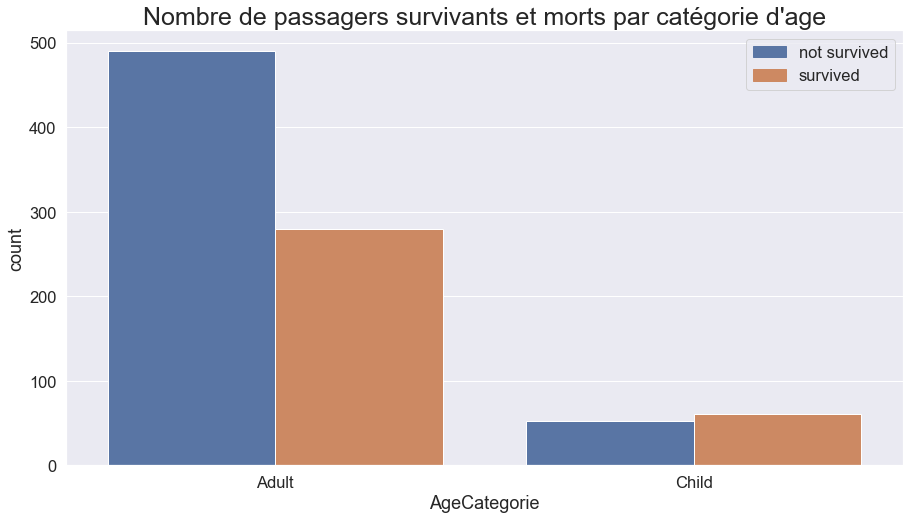

In [42]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par catégorie d'age", fontsize=25)

sns.countplot(x=merged_df['AgeCategorie'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
;
#plt.savefig("Nombre de survivants par cat age.jpg")

#### Fare_categorie

In [43]:
merged_df['Fare_categorie']=pd.qcut(merged_df.Fare, 4, labels=['v_low','low','high','v_high'])

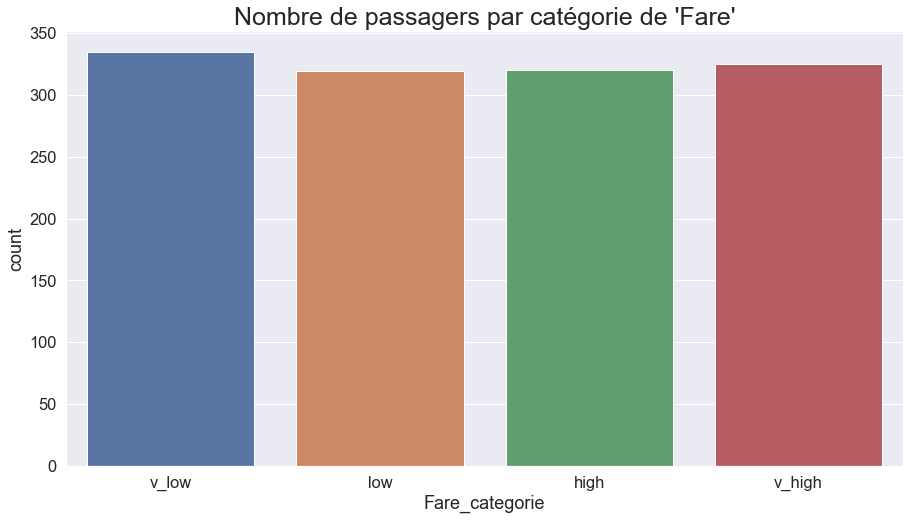

In [44]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers par catégorie de 'Fare'",fontsize=25)
sns.countplot(x=merged_df['Fare_categorie'], data=merged_df);
#plt.savefig("Nombre de pas par cat de fare.jpg")

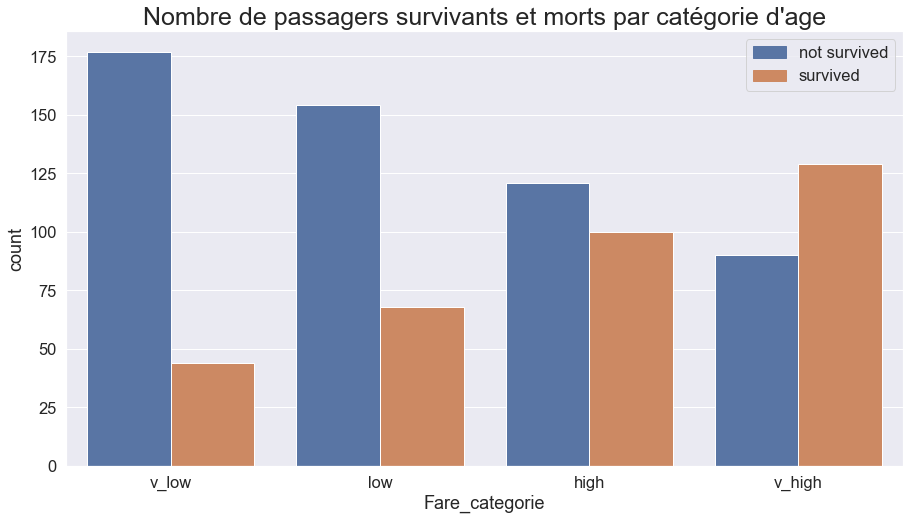

In [45]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par catégorie d'age", fontsize=25)

sns.countplot(x=merged_df['Fare_categorie'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels);

#plt.savefig("Nombre de survivants par cat fare.jpg")

#### CabinCategorie

In [46]:
merged_df['Cabin'].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90'

##### Les valeurs de la colonne sont très différentes on se contente de garder la lettre de chaque cabine

In [47]:
def cabin_categ(row):
    cabin = row['Cabin']
    if pd.notnull(cabin):
        return str(cabin)[0]
    else:
        return 'NN'


In [48]:
merged_df['CabinCategorie']=merged_df.apply(cabin_categ,axis=1)

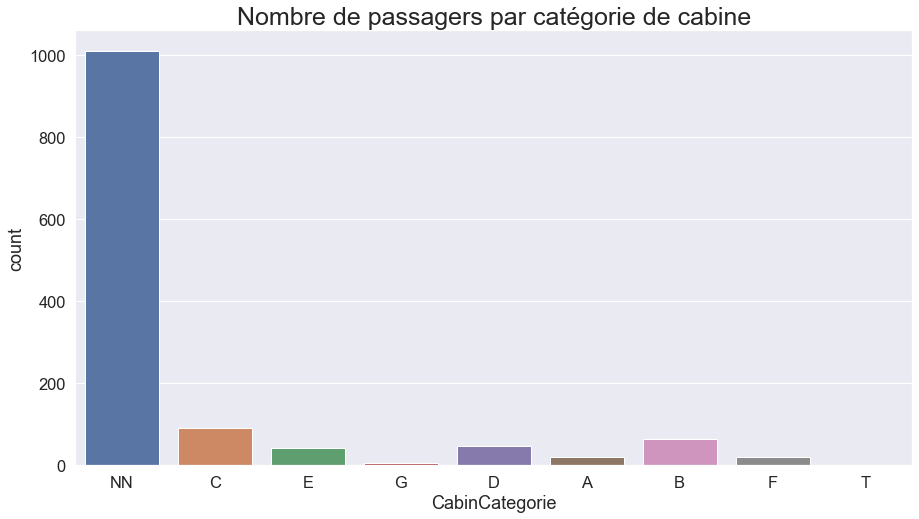

In [49]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers par catégorie de cabine",fontsize=25)

sns.countplot(x=merged_df['CabinCategorie'], data=merged_df);
#plt.savefig("Nombre de pass par cat cab.jpg")

##### Il y a une seule ligne avec T dans la categorie de la cabine on lui associe la valeur nulle

In [50]:
merged_df.loc[merged_df['CabinCategorie']=="T",'CabinCategorie']='NN'

''

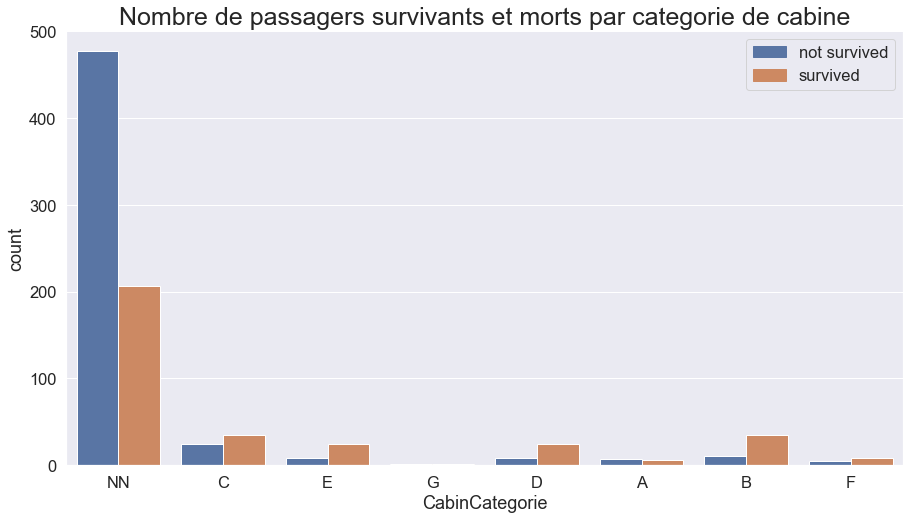

In [51]:
plt.figure(figsize=(15,8))
plt.title("Nombre de passagers survivants et morts par categorie de cabine", fontsize=25)

sns.countplot(x=merged_df['CabinCategorie'],hue='Survived', data=merged_df)
colors = {'not survived':'#5975a4', 'survived':'#cd8962'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
;
#plt.savefig("Nombre de surviants par lieu d'embarquement.jpg");

#### Female

In [52]:
merged_df['female'] = np.where(merged_df['Sex'] == 'female', 1, 0)

#### Finalisation de la creation des colonnes 

In [53]:
merged_df = pd.get_dummies(merged_df,columns= ['CabinCategorie','Pclass','Fare_categorie','Embarked','AgeCategorie'])

In [54]:
merged_df.drop(['Cabin','Name','Ticket','Sex','Fare'], axis=1, inplace=True)

In [55]:
merged_df

,Survived,Age,SibSp,Parch,female,CabinCategorie_A,CabinCategorie_B,CabinCategorie_C,CabinCategorie_D,CabinCategorie_E,...,Pclass_3,Fare_categorie_v_low,Fare_categorie_low,Fare_categorie_high,Fare_categorie_v_high,Embarked_C,Embarked_Q,Embarked_S,AgeCategorie_Adult,AgeCategorie_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,22.0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0
2,1.0,38.0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
3,1.0,26.0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
4,1.0,35.0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
5,0.0,35.0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,24.0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1306,NaN,39.0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
1307,NaN,38.5,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0


### Créer les datasets de train et de test 

In [56]:
test_dataset=merged_df.loc[merged_df.Survived.isnull()]

In [57]:
test_dataset.drop('Survived',inplace=True,axis=1)

In [58]:
#création de fichier csv pour les données de test pretraitées 
test_dataset.to_csv('preprocessed_test_dataset.csv')

In [59]:
train_dataset=merged_df.loc[merged_df.Survived.notnull()]

In [60]:
#création de fichier csv pour les données de train pretraitées 
train_dataset.to_csv('preprocessed_train_dataset.csv')

In [61]:
train_dataset['Survived']=train_dataset['Survived'].astype('int64', copy=False)

In [62]:
X = train_dataset.loc[:,'Age':].to_numpy()
y = train_dataset['Survived'].to_numpy()

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Entrainement

### Sans recherche d'hyperparametres et sans standardisation des données 

* **Regression Logistique** 

In [64]:
LR = LogisticRegression(random_state=42,max_iter=1000)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [65]:
confusion_matrix(y_val,LR.predict(X_val))

array([[89, 24],
       [11, 53]], dtype=int64)

In [66]:
accuracy_score(y_val, LR.predict(X_val))

0.8022598870056498

* **RandomForest**

In [67]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
confusion_matrix(y_val,RF.predict(X_val))

array([[91, 22],
       [14, 50]], dtype=int64)

In [69]:
accuracy_score(y_val, RF.predict(X_val))

0.7966101694915254

* **Adaboost**

In [70]:
AB=AdaBoostClassifier()
AB.fit(X_train, y_train)


AdaBoostClassifier()

In [71]:
confusion_matrix(y_val,AB.predict(X_val))

array([[89, 24],
       [12, 52]], dtype=int64)

In [72]:
accuracy_score(y_train, AB.predict(X_train))

0.8314447592067988

In [73]:
accuracy_score(y_val, AB.predict(X_val))

0.7966101694915254

* **SVM**

In [74]:
SVM=svm.SVC(random_state=42)
SVM.fit(X_train, y_train)

SVC(random_state=42)

In [75]:
confusion_matrix(y_val,SVM.predict(X_val))

array([[109,   4],
       [ 59,   5]], dtype=int64)

In [76]:
accuracy_score(y_train, SVM.predict(X_train))

0.6359773371104815

In [77]:
accuracy_score(y_val, SVM.predict(X_val))

0.6440677966101694

* **Reseaux de neurones** 

In [78]:
RN=MLPClassifier(random_state=42)
RN.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [79]:
confusion_matrix(y_val,RN.predict(X_val))

array([[93, 20],
       [12, 52]], dtype=int64)

In [80]:
accuracy_score(y_train, RN.predict(X_train))

0.8456090651558074

In [81]:
accuracy_score(y_val, RN.predict(X_val))

0.8192090395480226

* **Decision Tree**

In [82]:
DF = DecisionTreeClassifier(random_state=42)
DF.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
confusion_matrix(y_val,DF.predict(X_val))

array([[94, 19],
       [15, 49]], dtype=int64)

In [84]:
accuracy_score(y_train, DF.predict(X_train))

0.9617563739376771

In [85]:
accuracy_score(y_val, DF.predict(X_val))

0.807909604519774

* **Gradient Boosting**

In [86]:
GB=GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [87]:
confusion_matrix(y_val,GB.predict(X_val))

array([[98, 15],
       [16, 48]], dtype=int64)

In [88]:
accuracy_score(y_train, GB.predict(X_train))

0.8838526912181303

In [89]:
accuracy_score(y_val, GB.predict(X_val))

0.8248587570621468

* **KNN**

In [90]:
KNN=KNeighborsClassifier()

In [91]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
confusion_matrix(y_val,KNN.predict(X_val))

array([[100,  13],
       [ 23,  41]], dtype=int64)

In [93]:
accuracy_score(y_train, KNN.predict(X_train))

0.8385269121813032

In [94]:
accuracy_score(y_val, KNN.predict(X_val))

0.7966101694915254

### Standardisation des donnees et réentraimenent des modeles 

In [95]:
ss= StandardScaler()
X_train_ss= ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)

* **Regression Logistique** 

In [96]:
LR_ss = LogisticRegression(random_state=42)
LR_ss.fit(X_train_ss,y_train)


LogisticRegression(random_state=42)

In [97]:
accuracy_score(y_train, LR_ss.predict(X_train_ss))

0.8101983002832861

In [98]:
accuracy_score(y_val, LR_ss.predict(X_val_ss))

0.8022598870056498

In [99]:
confusion_matrix(y_val,LR_ss.predict(X_val_ss))

array([[89, 24],
       [11, 53]], dtype=int64)

* **RandomForest**

In [100]:
RF_ss = RandomForestClassifier(random_state=42)
RF_ss.fit(X_train_ss, y_train)

RandomForestClassifier(random_state=42)

In [101]:
accuracy_score(y_train, RF_ss.predict(X_train_ss))

0.9617563739376771

In [102]:
accuracy_score(y_val, RF_ss.predict(X_val_ss))

0.7966101694915254

In [103]:
confusion_matrix(y_val,RF_ss.predict(X_val_ss))

array([[91, 22],
       [14, 50]], dtype=int64)

* **Adaboost**

In [104]:
AB_ss=AdaBoostClassifier(random_state=42)
AB_ss.fit(X_train_ss, y_train)

AdaBoostClassifier(random_state=42)

In [105]:
accuracy_score(y_train, AB_ss.predict(X_train_ss))

0.8314447592067988

In [106]:
accuracy_score(y_val, AB_ss.predict(X_val_ss))

0.7966101694915254

In [107]:
confusion_matrix(y_val,AB_ss.predict(X_val_ss))

array([[89, 24],
       [12, 52]], dtype=int64)

* **SVM**

In [108]:
SVM_ss=svm.SVC(random_state=42)
SVM_ss.fit(X_train_ss, y_train)

SVC(random_state=42)

In [109]:
accuracy_score(y_train, SVM_ss.predict(X_train_ss))

0.8569405099150141

In [110]:
accuracy_score(y_val, SVM_ss.predict(X_val_ss))

0.847457627118644

In [111]:
# meilleur resultat en standardisant les données pour le SVM

In [112]:
confusion_matrix(y_val,SVM_ss.predict(X_val_ss))

array([[101,  12],
       [ 15,  49]], dtype=int64)

* **Reseaux de neurones** 

In [113]:
RN_ss=MLPClassifier(random_state=42)
RN_ss.fit(X_train_ss, y_train)

MLPClassifier(random_state=42)

In [114]:
confusion_matrix(y_val,RN_ss.predict(X_val_ss))

array([[96, 17],
       [18, 46]], dtype=int64)

In [115]:
accuracy_score(y_train, RN_ss.predict(X_train_ss))

0.8923512747875354

In [116]:
accuracy_score(y_val, RN_ss.predict(X_val_ss))

0.8022598870056498

* **Decision Tree**

In [117]:
DF_ss = DecisionTreeClassifier(random_state=42)
DF_ss.fit(X_train_ss, y_train)

DecisionTreeClassifier(random_state=42)

In [118]:
confusion_matrix(y_val,DF_ss.predict(X_val_ss))

array([[94, 19],
       [15, 49]], dtype=int64)

In [119]:
accuracy_score(y_train, DF_ss.predict(X_train_ss))

0.9617563739376771

In [120]:
accuracy_score(y_val, DF_ss.predict(X_val_ss))

0.807909604519774

* **Gradient Boosting**

In [121]:
GB_ss=GradientBoostingClassifier()


In [122]:
GB_ss.fit(X_train_ss, y_train)

GradientBoostingClassifier()

In [123]:
confusion_matrix(y_val,GB_ss.predict(X_val_ss))

array([[98, 15],
       [15, 49]], dtype=int64)

In [124]:
accuracy_score(y_train, GB_ss.predict(X_train_ss))

0.8838526912181303

In [125]:
accuracy_score(y_val, GB_ss.predict(X_val_ss))

0.8305084745762712

* **KNN**

In [126]:
KNN_ss=KNeighborsClassifier()

In [127]:
KNN_ss.fit(X_train_ss, y_train)

KNeighborsClassifier()

In [128]:
confusion_matrix(y_val,KNN_ss.predict(X_val_ss))

array([[92, 21],
       [14, 50]], dtype=int64)

In [129]:
accuracy_score(y_train, KNN_ss.predict(X_train_ss))

0.8597733711048159

In [130]:
accuracy_score(y_val, KNN_ss.predict(X_val_ss))

0.8022598870056498

## Recherche d'hyperparametre

In [131]:
# dictionnaires d'accuracy et de f1-score et de prediction pour données non standardisées 
accu_dict = {}
f1_dict = {}
pred_dict = {}

In [132]:
# dictionnaires d'accuracy et de f1-score pour données standardisées 
accu_dict_ss = {}
f1_dict_ss = {}
pred_dict_ss = {}

* **Regression Logistique : données non standardisées** 

In [133]:
 LogisticRegression_param = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs'],
    'penalty': ['l2','none'],

    'tol': np.linspace(10**-6,10**-2,10)
}

In [134]:
lr = GridSearchCV(LR,LogisticRegression_param, verbose=1, n_jobs=-1)

In [135]:
lr_best=lr.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [136]:
lr.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1e-06}

In [137]:
lr_best.best_score_

0.8030266706622715

In [138]:
accu_val_hyperparm = accuracy_score(y_val, lr_best.predict(X_val))

In [139]:
accu_dict["LR"] = accu_val_hyperparm*100

In [140]:
f1score = f1_score(y_val, lr_best.predict(X_val), average='weighted')

In [141]:
f1_dict["LR"]=f1score*100

In [142]:
lr_pred_label=lr_best.predict(test_dataset)

In [143]:
lr_pred_label=lr_best.predict(test_dataset)
pred_dict["Logistic Regression"] = lr_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression
0,0
1,0
2,0
3,0
4,0
...,...
411,0
412,1
413,0
414,0


* **Regression Logistique : données standardisées** 

In [144]:
lr_best_ss=lr.fit(X_train_ss, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [145]:
lr_best_ss.best_score_

0.7987913295375086

In [146]:
accu_val_hyperparm_ss = accuracy_score(y_val, lr_best_ss.predict(X_val_ss))

In [147]:
accu_dict_ss["LR"] = accu_val_hyperparm_ss*100

In [148]:
f1score = f1_score(y_val, lr_best_ss.predict(X_val_ss), average='weighted')

In [149]:
f1_dict_ss["LR"]=f1score*100

* **Random Forest : données non standardisées** 

In [150]:
randForest_param = {
    'n_estimators': [10, 50, 100],   
    'max_depth': [None, 300, 500, 1000],   
    'min_samples_leaf': [1, 2, 3],   
    'min_samples_split': [4, 5, 6, 7, 8],   
    'max_features': ['log2', 'sqrt'],
    'criterion': ['gini', 'entropy']

}

In [151]:
rf = GridSearchCV(RF, randForest_param, verbose=1, n_jobs=-1)

In [152]:
rf_best=rf.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [153]:
rf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [154]:
rf.best_score_

0.8370392568175007

In [155]:
accu_val_hyperparm = accuracy_score(y_val, rf_best.predict(X_val))

In [156]:
accu_dict["Random Forest"] = accu_val_hyperparm*100

In [157]:
f1score = f1_score(y_val, rf_best.predict(X_val), average='weighted')
f1_dict["Random Forest"]=f1score*100

In [158]:
rf_pred_label=rf_best.predict(test_dataset)
pred_dict["Random Forest"] = rf_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
411,0,0
412,1,1
413,0,0
414,0,0


* **Random Forest : données standardisées** 

In [159]:
rf_best_ss=rf.fit(X_train_ss, y_train)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [160]:
rf_best_ss.best_score_

0.8327939266806513

In [161]:
accu_val_hyperparm_ss = accuracy_score(y_val, rf_best_ss.predict(X_val_ss))

In [162]:
accu_dict_ss["Random Forest"] = accu_val_hyperparm_ss*100

In [163]:
f1score = f1_score(y_val, rf_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["Random Forest"]=f1score*100

In [164]:
f1_dict_ss

{'LR': 80.53412432764637, 'Random Forest': 81.58170045683865}

* **Adaboost : données non standardisées** 

In [165]:
adaboost_param = {
    'n_estimators': np.arange(10, 60, 10),
    'learning_rate': [0.5 , 1, 1.5 ,2]
}

In [166]:
ad = GridSearchCV(AB,adaboost_param, verbose=1, n_jobs=-1)

In [167]:
best_ad=ad.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [168]:
ad.best_params_

{'learning_rate': 1.5, 'n_estimators': 20}

In [169]:
ad.best_score_

0.8172510238737388

In [170]:
accu_val_hyperparm=accuracy_score(y_val, best_ad.predict(X_val))

In [171]:
accu_dict["AdaBoost"] = accu_val_hyperparm*100

In [172]:
f1score = f1_score(y_val, best_ad.predict(X_val), average='weighted')
f1_dict["AdaBoost"]=f1score*100

In [173]:
ad_pred_label=best_ad.predict(test_dataset)
pred_dict["AdaBoost"] = ad_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
411,0,0,0
412,1,1,1
413,0,0,0
414,0,0,0


* **Adaboost : données standardisées** 

In [174]:
ad_best_ss=ad.fit(X_train_ss, y_train)
ad_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, ad_best_ss.predict(X_val_ss))
accu_dict_ss["Adaboost"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, ad_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["Adaboost"]=f1score*100



Fitting 5 folds for each of 20 candidates, totalling 100 fits


* **SVM : données non standardisées** 

In [175]:
SVM_param = {
   'kernel': ['rbf', 'sigmoid','linear'],
    'gamma': [0.00001, 0.0001, 0.001, 0.004, 0.007, 0.01, 0.02, 0.05]
}

In [176]:
svm0= GridSearchCV(SVM,SVM_param, verbose=1,n_jobs=-1)

In [177]:
best_svm=svm0.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [178]:
svm0.best_params_

{'gamma': 0.05, 'kernel': 'rbf'}

In [179]:
svm0.best_score_

0.793137548696434

In [180]:
accu_val_hyperparm=accuracy_score(y_val, best_svm.predict(X_val))

In [181]:
accu_dict["SVM"] = accu_val_hyperparm*100

In [182]:
f1score = f1_score(y_val, best_svm.predict(X_val), average='weighted')
f1_dict["SVM"]=f1score*100

In [183]:
svm_pred_label=best_svm.predict(test_dataset)
pred_dict["SVM"] = svm_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,1,1
...,...,...,...,...
411,0,0,0,0
412,1,1,1,1
413,0,0,0,0
414,0,0,0,0


* **Adaboost : données standardisées** 

In [184]:
svm_best_ss=svm0.fit(X_train_ss, y_train)
svm_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, svm_best_ss.predict(X_val_ss))
accu_dict_ss["SVM"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, svm_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["SVM"]=f1score*100

Fitting 5 folds for each of 24 candidates, totalling 120 fits


* **Réseaux de neurones: données non standardisées** 

In [185]:
NN_param = {
    'hidden_layer_sizes': np.arange(105,115,1),
    'learning_rate_init': np.arange(0.0001, .5, 0.1),
    'solver': ['sgd','adam'],
}

In [186]:
rn=GridSearchCV(RN,NN_param, verbose=1, n_jobs=-1)

In [187]:
best_rn=rn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [188]:
rn.best_params_

{'hidden_layer_sizes': 110,
 'learning_rate_init': 0.10010000000000001,
 'solver': 'adam'}

In [189]:
rn.best_score_

0.825731695135351

In [190]:
accu_val_hyperparm=accuracy_score(y_val, best_rn.predict(X_val))

In [191]:
accu_dict["RN"] = accu_val_hyperparm*100

In [192]:
f1score = f1_score(y_val, best_rn.predict(X_val), average='weighted')
f1_dict["RN"]=f1score*100

In [193]:
rn_pred_label=best_rn.predict(test_dataset)
pred_dict["RN"] = rn_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,1,1,0
...,...,...,...,...,...
411,0,0,0,0,0
412,1,1,1,1,1
413,0,0,0,0,0
414,0,0,0,0,0


* **Réseaux de neurones: données standardisées** 

In [194]:
rn_best_ss=rn.fit(X_train_ss, y_train)
rn_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, rn_best_ss.predict(X_val_ss))
accu_dict_ss["RN"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, rn_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["RN"]=f1score*100

Fitting 5 folds for each of 100 candidates, totalling 500 fits


* **Decision Tree: données non standardisées**

In [195]:
 DTS_param = {
    'max_depth': [None,1,5, 10, 50, 100],
    'min_samples_leaf': list(range(2, 6)),
    'criterion': ['gini', 'entropy']
}

In [196]:
df= GridSearchCV(DF,DTS_param,verbose=1,n_jobs=-1)

In [197]:
best_df=df.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [198]:
df.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4}

In [199]:
df.best_score_

0.8172710018979122

In [200]:
accu_val_hyperparm=accuracy_score(y_val, best_df.predict(X_val))

In [201]:
accu_dict["DF"] = accu_val_hyperparm*100

In [202]:
f1score = f1_score(y_val,best_df.predict(X_val), average='weighted')
f1_dict["DF"]=f1score*100

In [203]:
dt_pred_label=best_df.predict(test_dataset)
pred_dict["Decision tree"] = dt_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,1,0,1
...,...,...,...,...,...,...
411,0,0,0,0,0,0
412,1,1,1,1,1,1
413,0,0,0,0,0,0
414,0,0,0,0,0,0


* **Decision Tree: données standardisées**

In [204]:
df_best_ss=df.fit(X_train_ss, y_train)
df_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, df_best_ss.predict(X_val_ss))
accu_dict_ss["Decision tree"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, df_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["Decision tree"]=f1score*100

Fitting 5 folds for each of 48 candidates, totalling 240 fits


* **Gradient Boosting: données non standardisées**

In [205]:
 GB_param = {
    "learning_rate": [0.01, 0.05, 0.075, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "max_depth":[3,5,8],
    "max_features":[None,"log2","sqrt"],
    }

In [206]:
GB= GridSearchCV(GradientBoostingClassifier(),GB_param,verbose=1,n_jobs=-1)

In [207]:
best_GB= GB.fit(X_train, y_train)

Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


In [208]:
GB.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.30000000000000004}

In [209]:
GB.best_score_

0.8243032664069523

In [210]:
accu_val_hyperparm=accuracy_score(y_val, best_GB.predict(X_val))

In [211]:
accu_dict["GB"] = accu_val_hyperparm*100

In [212]:
f1score = f1_score(y_val,best_GB.predict(X_val), average='weighted')
f1_dict["GB"]=f1score*100

In [213]:
gb_pred_label=best_GB.predict(test_dataset)
pred_dict["Gradient boosting"] = gb_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...
411,0,0,0,0,0,0,0
412,1,1,1,1,1,1,1
413,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0


* **Gradient Boosting: données standardisées**

In [214]:
gb_best_ss=GB.fit(X_train_ss, y_train)
gb_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, gb_best_ss.predict(X_val_ss))
accu_dict_ss["GB"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, gb_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["GB"]=f1score*100

Fitting 5 folds for each of 1125 candidates, totalling 5625 fits


* **KNN: données non standardisées**

In [215]:
KNN_param = {
    'n_neighbors': list(range(1, 40)),
    'leaf_size': list(range(1, 40)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [216]:
KNN= GridSearchCV(KNeighborsClassifier(),KNN_param,verbose=1,n_jobs=-1)

In [217]:
best_knn= KNN.fit(X_train, y_train)

Fitting 5 folds for each of 9126 candidates, totalling 45630 fits


In [218]:
KNN.best_params_


{'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 9,
 'weights': 'distance'}

In [219]:
KNN.best_score_

0.7973928678453701

In [220]:
accu_val_hyperparm=accuracy_score(y_val, best_knn.predict(X_val))

In [221]:
accu_dict["Knn"] = accu_val_hyperparm*100

In [222]:
f1score = f1_score(y_val,best_knn.predict(X_val), average='weighted')
f1_dict["Knn"]=f1score*100

In [223]:
knn_pred_label=best_knn.predict(test_dataset)
pred_dict["KNN"] = knn_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...
411,0,0,0,0,0,0,0,0
412,1,1,1,1,1,1,1,1
413,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0


* **KNN: données standardisées**

In [224]:
knn_best_ss=KNN.fit(X_train_ss, y_train)
knn_best_ss.best_score_
accu_val_hyperparm_ss = accuracy_score(y_val, knn_best_ss.predict(X_val_ss))
accu_dict_ss["KNN"] = accu_val_hyperparm_ss*100
f1score = f1_score(y_val, knn_best_ss.predict(X_val_ss), average='weighted')
f1_dict_ss["KNN"]=f1score*100

Fitting 5 folds for each of 9126 candidates, totalling 45630 fits


### Voting models: données non standardisées  

In [225]:
clf1 = LogisticRegression(**lr.best_params_,random_state=42)
clf2 = RandomForestClassifier(**rf.best_params_,random_state=42)
clf3 = MLPClassifier(**rn.best_params_,random_state=42)
clf4 = DecisionTreeClassifier(**df.best_params_,random_state=42)
clf5 = AdaBoostClassifier(**ad.best_params_,random_state=42)
clf6 = svm.SVC(**svm0.best_params_, probability=True,random_state=42)
clf7= GradientBoostingClassifier(**GB.best_params_,random_state=42)
clf8=KNeighborsClassifier(**KNN.best_params_)


eclf1 = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('mlp', clf3), ('dtc', clf4), ('ad', clf5), ('svm', clf6),('gb', clf7),('knn', clf8)],
     voting='hard')

eclf2 = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('mlp', clf3), ('dtc', clf4), ('ad', clf5), ('svm', clf6),('gb', clf7),('knn', clf8)],
     voting='soft')

eclf3 = VotingClassifier(
     estimators=[('rf', clf2),('gb', clf7),('knn', clf8)],
     voting='soft')
eclf5 = VotingClassifier(
     estimators=[('rf', clf2),('gb', clf7),('knn', clf8)],
     voting='hard')

eclf4 = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('mlp', clf3), ('dtc', clf4), ('ad', clf5), ('svm', clf6)],
     voting='soft')

eclf6 = VotingClassifier(
     estimators=[('lr', clf1), ('rf', clf2), ('mlp', clf3), ('dtc', clf4), ('ad', clf5), ('svm', clf6)],
     voting='hard')

eclf7 = VotingClassifier(
     estimators=[('svm', clf6),('gb', clf7),('dtc', clf4)],
     voting='soft')
eclf8 = VotingClassifier(
     estimators=[('svm', clf6),('gb', clf7),('dtc', clf4)],
     voting='hard')


In [226]:
eclf1 = eclf1.fit(X_train, y_train)

In [227]:
accu_val_hyperparm=accuracy_score(y_val, eclf1.predict(X_val))
accu_dict["Voting eclf1"] = accu_val_hyperparm*100

In [228]:
f1score = f1_score(y_val, eclf1.predict(X_val), average='weighted')
f1_dict["Voting eclf1"]=f1score*100

In [229]:
eclf1_pred_label=eclf1.predict(test_dataset)
pred_dict["eclf1"] = eclf1_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN,eclf1
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
411,0,0,0,0,0,0,0,0,0
412,1,1,1,1,1,1,1,1,1
413,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0


In [230]:
eclf2 = eclf2.fit(X_train, y_train)

In [231]:
accu_val_hyperparm=accuracy_score(y_val, eclf2.predict(X_val))
accu_dict["Voting eclf2"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf2.predict(X_val), average='weighted')
f1_dict["Voting eclf2"]=f1score*100


In [232]:
eclf2_pred_label=eclf2.predict(test_dataset)
pred_dict["eclf2"] = eclf2_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN,eclf1,eclf2
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
411,0,0,0,0,0,0,0,0,0,0
412,1,1,1,1,1,1,1,1,1,1
413,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0


In [233]:
eclf3 = eclf3.fit(X_train, y_train)

In [234]:
accu_val_hyperparm=accuracy_score(y_val, eclf3.predict(X_val))
accu_dict["Voting eclf3"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf3.predict(X_val), average='weighted')
f1_dict["Voting eclf3"]=f1score*100

In [235]:
eclf3_pred_label=eclf3.predict(test_dataset)
pred_dict["eclf3"] = eclf3_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN,eclf1,eclf2,eclf3
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1
4,0,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
411,0,0,0,0,0,0,0,0,0,0,0
412,1,1,1,1,1,1,1,1,1,1,1
413,0,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,0


In [236]:
eclf4 = eclf4.fit(X_train, y_train)

In [237]:
accu_val_hyperparm=accuracy_score(y_val, eclf4.predict(X_val))
accu_dict["Voting eclf4"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf4.predict(X_val), average='weighted')
f1_dict["Voting eclf4"]=f1score*100

In [238]:
eclf4_pred_label=eclf4.predict(test_dataset)
pred_dict["eclf4"] = eclf4_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN,eclf1,eclf2,eclf3,eclf4
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
411,0,0,0,0,0,0,0,0,0,0,0,0
412,1,1,1,1,1,1,1,1,1,1,1,1
413,0,0,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,0,0


In [239]:
eclf5 = eclf5.fit(X_train, y_train)

In [240]:
accu_val_hyperparm=accuracy_score(y_val, eclf5.predict(X_val))
accu_dict["Voting eclf5"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf5.predict(X_val), average='weighted')
f1_dict["Voting eclf5"]=f1score*100

In [241]:
eclf5_pred_label=eclf5.predict(test_dataset)
pred_dict["eclf5"] = eclf5_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN,eclf1,eclf2,eclf3,eclf4,eclf5
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0,0,0,0,0,0,0,0,0,0,0,0,0
412,1,1,1,1,1,1,1,1,1,1,1,1,1
413,0,0,0,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,0,0,0


In [242]:
eclf6 = eclf6.fit(X_train, y_train)

In [243]:
accu_val_hyperparm=accuracy_score(y_val, eclf6.predict(X_val))
accu_dict["Voting eclf6"] = accu_val_hyperparm*100
f1score = f1_score(y_val, eclf6.predict(X_val), average='weighted')
f1_dict["Voting eclf6"]=f1score*100

In [244]:
eclf6_pred_label=eclf6.predict(test_dataset)
pred_dict["eclf6"] = eclf6_pred_label
df_pred = pd.DataFrame.from_dict(pred_dict)
display(df_pred)

,Logistic Regression,Random Forest,AdaBoost,SVM,RN,Decision tree,Gradient boosting,KNN,eclf1,eclf2,eclf3,eclf4,eclf5,eclf6
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0,0,0,0,0,0,0,0,0,0,0,0,0,0
412,1,1,1,1,1,1,1,1,1,1,1,1,1,1
413,0,0,0,0,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [245]:
# on met les predictions dans un fichier csv
df_pred.to_csv('predictions_sur_test.csv')


##### Le tableau ci-dessus représente les predictions de nos différents modèles sur le dataset de test 

### Accuracy et F1-score pour nos modèles entrainés sur des données non standardisées

In [246]:
df_accu = pd.DataFrame.from_dict(accu_dict, orient='index', columns=['Accuracy'])
display(df_accu)



,Accuracy
LR,82.485876
Random Forest,81.355932
AdaBoost,79.096045
SVM,81.920904
RN,82.485876
DF,80.790960
GB,84.180791
Knn,79.096045
Voting eclf1,85.310734
Voting eclf2,84.745763


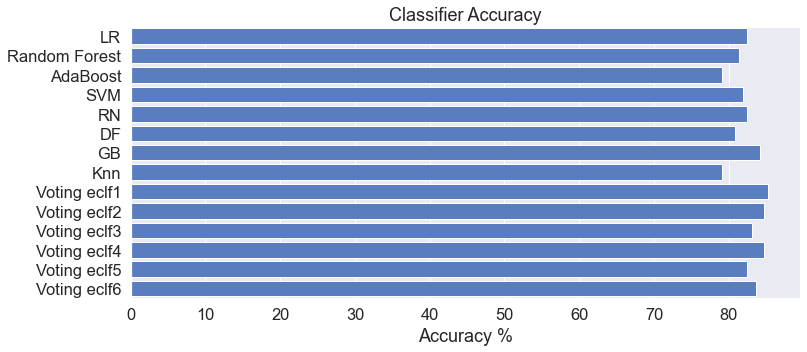

In [247]:
plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_accu, x="Accuracy", y=df_accu.index, color="b")


plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')

plt.savefig("Accu data nn stand.jpg");

,F1_score
LR,82.660039
Random Forest,81.581700
AdaBoost,79.421789
SVM,82.079127
RN,82.158954
DF,80.908952
GB,84.124624
Knn,79.059790
Voting eclf1,85.310734
Voting eclf2,84.817823


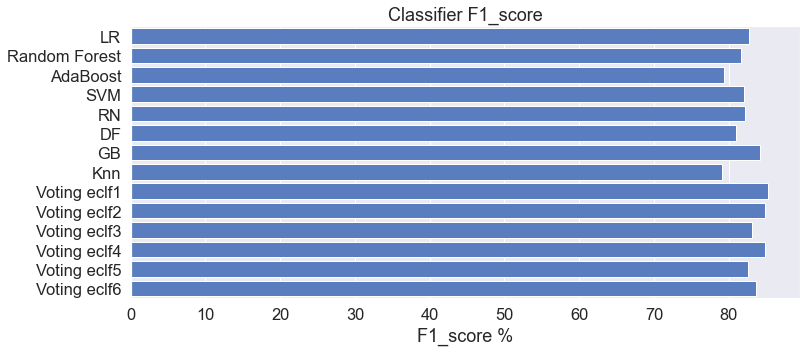

In [248]:
df_f1 = pd.DataFrame.from_dict(f1_dict, orient='index', columns=['F1_score'])
display(df_f1)
plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_f1, x="F1_score", y=df_f1.index, color="b")


plt.xlabel('F1_score %')
plt.title('Classifier F1_score')


plt.savefig("f1 data nn stand.jpg");

,Accuracy,F1_score
Voting eclf1,85.310734,85.310734
Voting eclf4,84.745763,84.859937
Voting eclf2,84.745763,84.817823
GB,84.180791,84.124624
Voting eclf6,83.615819,83.642914
Voting eclf3,83.050847,83.105560
LR,82.485876,82.660039
Voting eclf5,82.485876,82.514840
RN,82.485876,82.158954
SVM,81.920904,82.079127


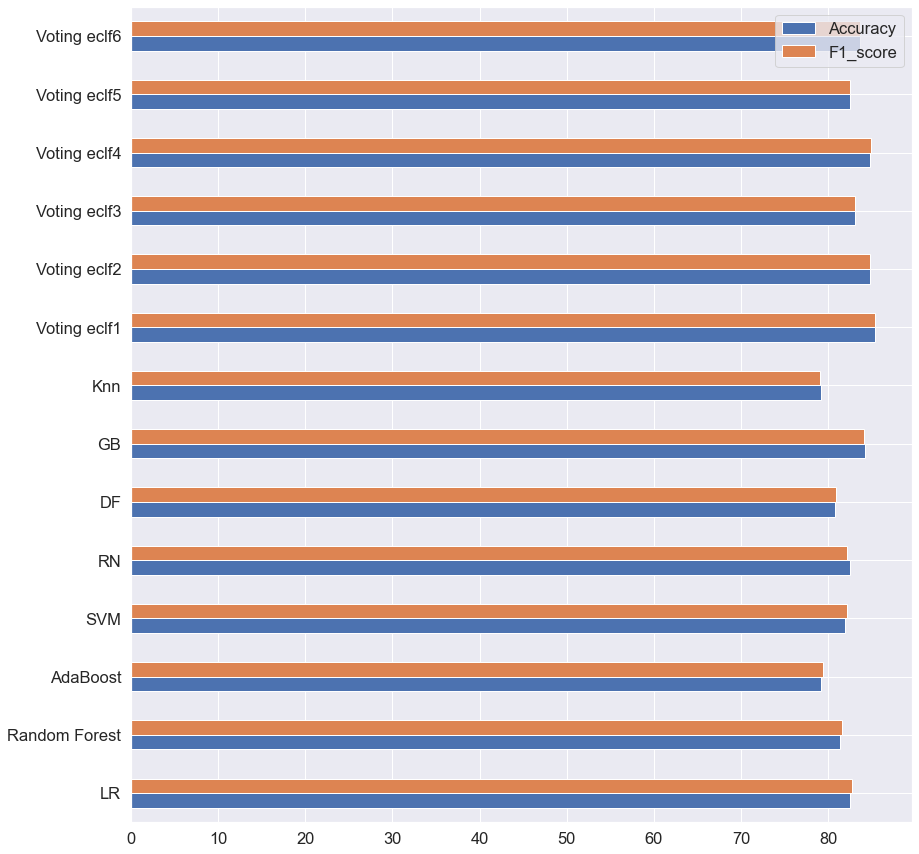

In [249]:
df_final = pd.concat([df_accu,df_f1],axis=1)
display(df_final.sort_values(by='F1_score',ascending=False))
df_final.plot.barh(y=["Accuracy","F1_score"],figsize=(14,15))
sns.set(font_scale=1.3)
plt.savefig("f1 acc data nn stand.jpg");

### Voting models: données standardisées  

In [250]:
eclf1_ss = eclf1.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf1_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf1"] = accu_val_hyperparm_ss*100

eclf2_ss = eclf2.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf2_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf2"] = accu_val_hyperparm_ss*100

eclf3_ss = eclf3.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf3_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf3"] = accu_val_hyperparm_ss*100

eclf4_ss = eclf4.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf4_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf4"] = accu_val_hyperparm_ss*100

eclf5_ss = eclf5.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf5_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf5"] = accu_val_hyperparm_ss*100

eclf6_ss = eclf6.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf6_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf6"] = accu_val_hyperparm_ss*100

eclf7_ss = eclf7.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf7_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf7"] = accu_val_hyperparm_ss*100

eclf8_ss = eclf8.fit(X_train_ss, y_train)
accu_val_hyperparm_ss=accuracy_score(y_val, eclf8_ss.predict(X_val_ss))
accu_dict_ss["Voting eclf8"] = accu_val_hyperparm_ss*100


In [256]:
f1score = f1_score(y_val, eclf1.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf1"]=f1score*100

f1score = f1_score(y_val, eclf2.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf2"]=f1score*100

f1score = f1_score(y_val, eclf3.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf3"]=f1score*100

f1score = f1_score(y_val, eclf4.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf4"]=f1score*100

f1score = f1_score(y_val, eclf5.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf5"]=f1score*100

f1score = f1_score(y_val, eclf6.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf6"]=f1score*100

f1score = f1_score(y_val, eclf7.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf7"]=f1score*100

f1score = f1_score(y_val, eclf8.predict(X_val_ss), average='weighted')
f1_dict_ss["Voting eclf8"]=f1score*100


### Accuracy et F1-score pour nos modèles entrainés sur des données standardisées

,Accuracy
LR,80.225989
Random Forest,81.355932
Adaboost,79.096045
SVM,84.745763
RN,78.531073
Decision tree,82.485876
GB,84.180791
Voting eclf1,81.920904
Voting eclf2,81.355932
Voting eclf3,82.485876


Text(0.5, 1.0, 'Classifier Accuracy')

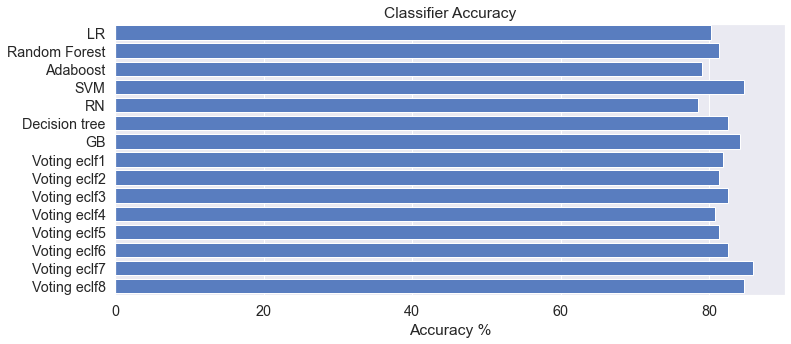

In [257]:
df_accu_ss = pd.DataFrame.from_dict(accu_dict_ss, orient='index', columns=['Accuracy'])
display(df_accu_ss)

plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_accu_ss, x="Accuracy", y=df_accu_ss.index, color="b")


plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')


,F1_score
LR,80.534124
Random Forest,81.581700
Adaboost,79.421789
SVM,84.662630
RN,78.600376
Decision tree,82.616965
GB,84.124624
Voting eclf1,82.079127
Voting eclf2,81.495479
Voting eclf3,82.568611


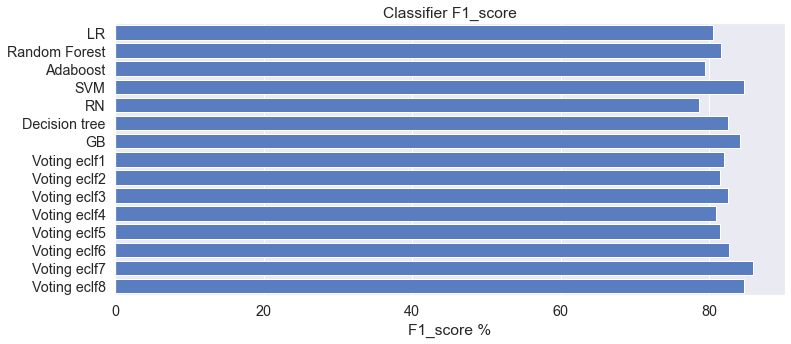

In [258]:
df_f1_ss = pd.DataFrame.from_dict(f1_dict_ss, orient='index', columns=['F1_score'])
display(df_f1_ss)
plt.figure(figsize=(12,5))
sns.set_color_codes("muted")
sns.barplot(data=df_f1_ss, x="F1_score", y=df_f1_ss.index, color="b")


plt.xlabel('F1_score %')
plt.title('Classifier F1_score')

plt.show()

In [259]:
df_final_ss = pd.concat([df_accu_ss,df_f1_ss],axis=1)

,Accuracy,F1_score
Voting eclf7,85.875706,85.899064
SVM,84.745763,84.662630
Voting eclf8,84.745763,84.662630
GB,84.180791,84.124624
Voting eclf6,82.485876,82.660039
Decision tree,82.485876,82.616965
Voting eclf3,82.485876,82.568611
Voting eclf1,81.920904,82.079127
Random Forest,81.355932,81.581700
Voting eclf2,81.355932,81.495479


<AxesSubplot:>

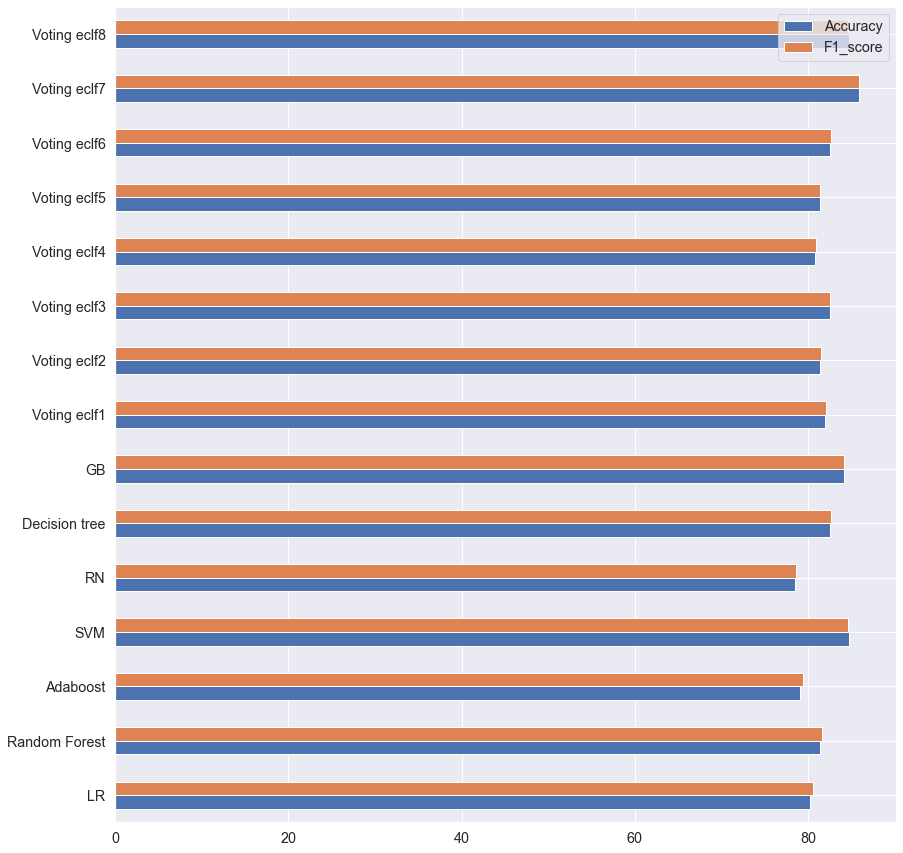

In [260]:
display(df_final_ss.sort_values(by='F1_score',ascending=False))
df_final_ss.plot.barh(y=["Accuracy","F1_score"],figsize=(14,15))

#plt.savefig("f1 acc data stand.jpg");